<a href="https://colab.research.google.com/github/ssalvi23/67_Experiment8_AIDS-II/blob/main/Exp8_AIDS_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx matplotlib


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a graph, plot it, and highlight specific nodes or edges
def plot_graph(G, title, suspicious_edges=None, suspicious_nodes=None):
    pos = nx.spring_layout(G)  # Position the nodes
    plt.figure(figsize=(8, 6))

    # Draw the entire graph with default node/edge colors
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12, edge_color='gray')

    # Highlight suspicious edges (fraudulent transactions)
    if suspicious_edges:
        nx.draw_networkx_edges(G, pos, edgelist=suspicious_edges, edge_color='red', width=3, label='Suspicious Transactions')

    # Highlight suspicious nodes (anomalous accounts)
    if suspicious_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=suspicious_nodes, node_color='orange', node_size=2000, label='Suspicious Accounts')

    plt.title(title, fontsize=15)
    plt.show()


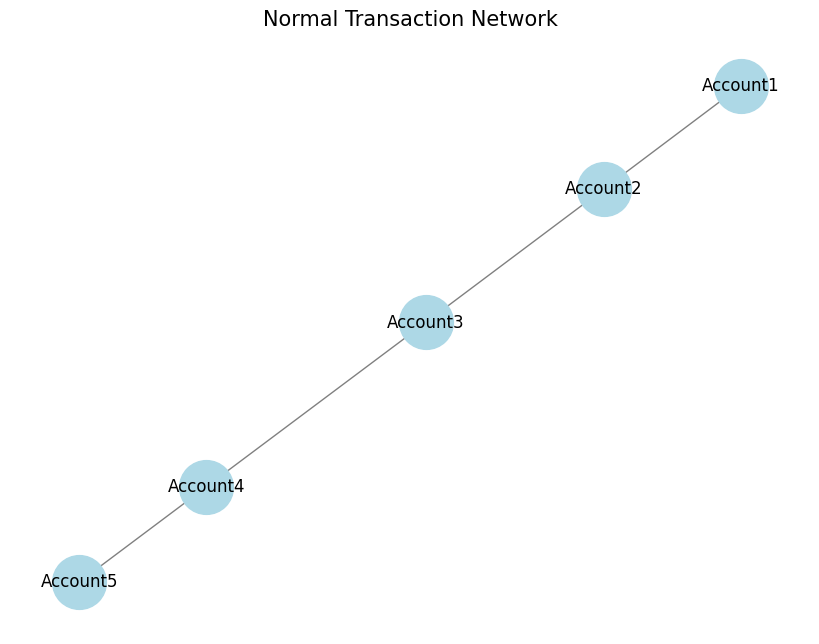

In [ ]:
# 1. Normal Transaction Network
G1 = nx.Graph()

# Add nodes (representing accounts) and edges (representing transactions with amounts)
G1.add_weighted_edges_from([("Account1", "Account2", 200), ("Account2", "Account3", 150),
                            ("Account3", "Account4", 100), ("Account4", "Account5", 300)])

# Plot the normal transaction network
plot_graph(G1, "Normal Transaction Network")


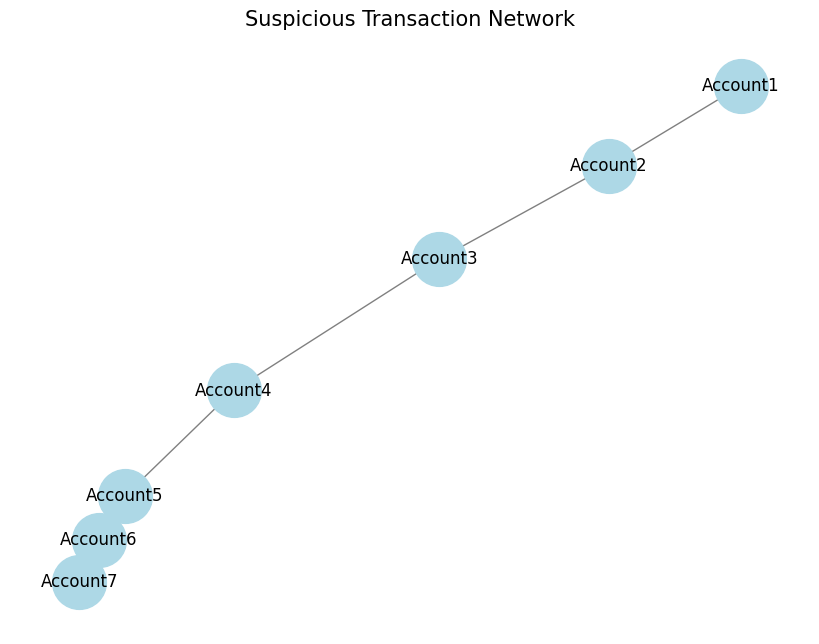

In [ ]:
# 2. Suspicious Transaction Network
G2 = nx.Graph()

# Add transactions with some high-value transactions indicating potential fraud
G2.add_weighted_edges_from([("Account1", "Account2", 200), ("Account2", "Account3", 150),
                            ("Account3", "Account4", 100), ("Account4", "Account5", 300),
                            ("Account5", "Account6", 5000),  # High-value transaction (suspicious)
                            ("Account6", "Account7", 6000)])  # Another high-value transaction (suspicious)

# Highlight suspicious edges based on transaction amounts (e.g., > $4000)
suspicious_edges = [("Account5", "Account6"), ("Account6", "Account7")]

# Plot the suspicious transaction network
plot_graph(G2, "Suspicious Transaction Network", suspicious_edges=suspicious_edges)


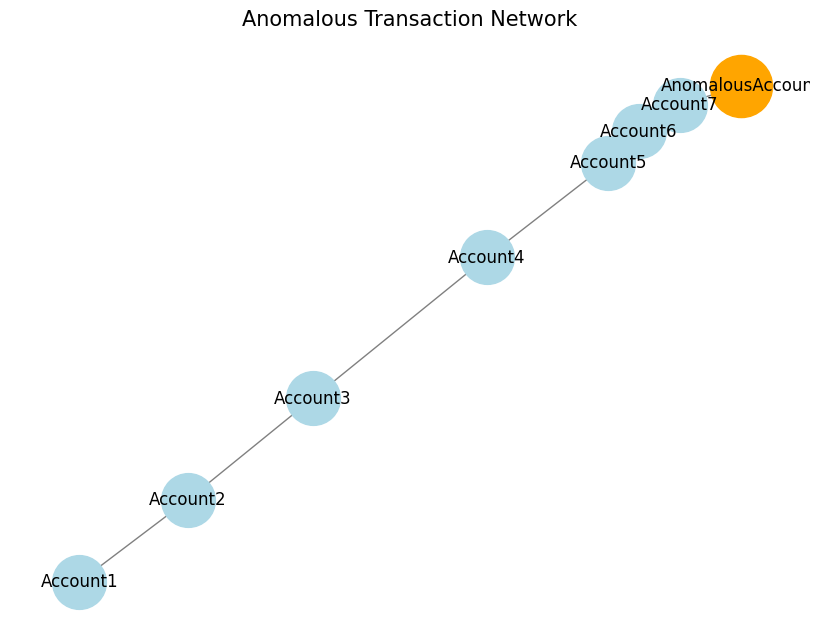

In [ ]:
# 3. Anomalous Transaction Network (Account-level anomalies)
G3 = nx.Graph()

# Add transactions and include an account with unusual activity (anomalous node)
G3.add_weighted_edges_from([("Account1", "Account2", 200), ("Account2", "Account3", 150),
                            ("Account3", "Account4", 100), ("Account4", "Account5", 300),
                            ("Account5", "Account6", 5000), ("Account6", "Account7", 6000),
                            ("Account7", "AnomalousAccount", 7000)])  # Rare interaction

# Highlight the anomalous account
anomalous_nodes = ["AnomalousAccount"]

# Plot the anomalous transaction network
plot_graph(G3, "Anomalous Transaction Network", suspicious_nodes=anomalous_nodes)


Suspicious Path (Minimum Risk): Account1 -> Account2 -> Account5
Total Risk: 7


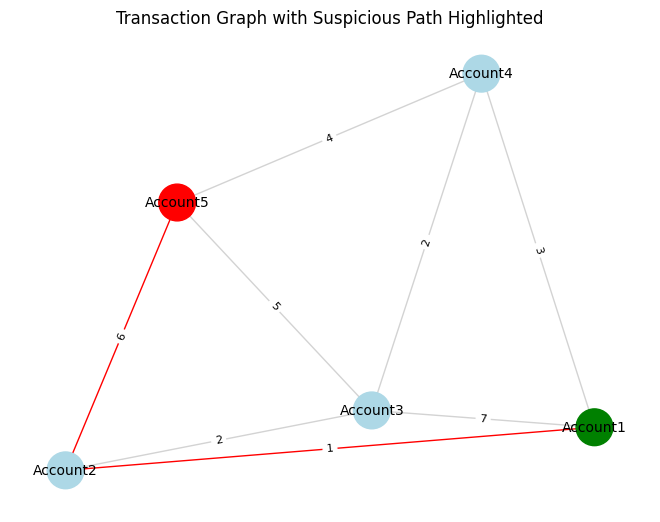

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Dijkstra's Algorithm for finding the shortest (lowest risk) path
def dijkstra(graph, start):
    # Initialize shortest distances to infinity and start node to 0
    shortest_distances = {node: float('inf') for node in graph}
    shortest_distances[start] = 0

    # Dictionary to store the previous node in the shortest path
    previous_nodes = {}

    # Set of unvisited nodes
    unvisited_nodes = set(graph)

    while unvisited_nodes:
        # Select the node with the smallest distance from the start node
        current_node = min(unvisited_nodes, key=lambda node: shortest_distances[node])
        unvisited_nodes.remove(current_node)

        # Update distances to neighboring nodes
        for neighbor, weight in graph[current_node].items():
            potential_route = shortest_distances[current_node] + weight
            if potential_route < shortest_distances[neighbor]:
                shortest_distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node

    return shortest_distances, previous_nodes

# Create a transaction graph where weights represent transaction risks
transaction_graph = {
    'Account1': {'Account2': 1, 'Account3': 7, 'Account4': 3},
    'Account2': {'Account1': 1, 'Account3': 2, 'Account5': 6},
    'Account3': {'Account1': 7, 'Account2': 2, 'Account4': 2, 'Account5': 5},
    'Account4': {'Account1': 3, 'Account3': 2, 'Account5': 4},
    'Account5': {'Account2': 6, 'Account3': 5, 'Account4': 4}
}

# Define start and end accounts for finding suspicious transactions
start_account = 'Account1'
end_account = 'Account5'

# Compute the shortest path (minimum risk) using Dijkstra's algorithm
shortest_distances, previous_nodes = dijkstra(transaction_graph, start_account)

# Extract the path with the minimum transaction risk
path = []
current_node = end_account
while current_node != start_account:
    path.insert(0, current_node)
    current_node = previous_nodes[current_node]
path.insert(0, start_account)

# Print the shortest path and transaction risks
print(f"Suspicious Path (Minimum Risk): {' -> '.join(path)}")
print(f"Total Risk: {shortest_distances[end_account]}")

# Visualize the transaction graph and highlight the suspicious path
G = nx.Graph()

# Add edges to the graph, where weights represent transaction risks
for node, neighbors in transaction_graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# Define node positions
pos = nx.spring_layout(G)

# Define node colors (highlight the start and end accounts)
node_colors = ['green' if node == start_account else 'red' if node == end_account else 'lightblue' for node in G.nodes()]

# Define edge colors (highlight the edges that are part of the shortest path)
edge_colors = ['red' if (u, v) in zip(path, path[1:]) or (v, u) in zip(path, path[1:]) else 'lightgray' for u, v in G.edges()]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=10, edge_color=edge_colors)

# Add edge labels (transaction risks)
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.title("Transaction Graph with Suspicious Path Highlighted")
plt.show()
